# Graph - NetworkX

- **Created by Andrés Segura Tinoco**
- **Created on Nov 27, 2019**

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [1]:
# Load the Python libraries
import networkx as nx
import math
import timeit

In [2]:
# Load Plotting libraries
import matplotlib.pyplot as plt

In [3]:
print('Networkx version:', nx.__version__)

Networkx version: 2.3


## 1. Simple Graph (SG)

In [4]:
# Create an empty Simple Graph (SG)
sg = nx.Graph()

In [5]:
# Add nodes
nodes_list = ["1", "2", "3", "4", "5"]
sg.add_nodes_from(nodes_list)
print(sg.nodes())

['1', '2', '3', '4', '5']


In [6]:
# Add edges
sg.add_edges_from([("1","2"), ("1","3"), ("1","4"), ("1","5"), ("3","2"), ("4","2"), ("4","3"), ("5","4")])
print(sg.edges())

[('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('3', '4'), ('4', '5')]


In [7]:
# Get neighbors of node "1"
list(sg.neighbors("1"))

['2', '3', '4', '5']

In [8]:
# Get nodes positions
pos = nx.layout.spring_layout(sg)
pos

{'1': array([-0.39731998,  0.65031304]),
 '2': array([ 0.87847097, -0.17497242]),
 '3': array([-0.88754724, -0.07127256]),
 '4': array([0.47068009, 0.59593194]),
 '5': array([-0.06428383, -1.        ])}

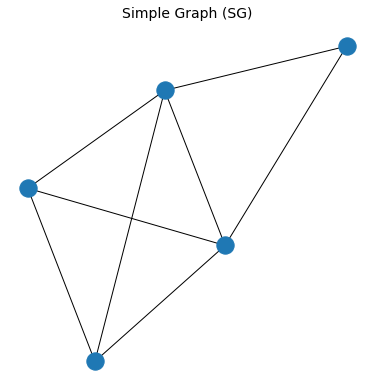

In [9]:
# Plot Simple Graph (free format)
plt.rcParams["figure.figsize"] = [5, 5]
nx.draw(sg)
plt.title('Simple Graph (SG)', fontsize=14)
plt.axis('off')
plt.show()

 ## 2. Directed Weighted Graph (DWG)

In [10]:
# Create an empty Directed Weighted Graph (DWG)
dwg = nx.DiGraph()

In [11]:
# Add nodes
nodes_list = ["1", "2", "3", "4", "5"]
dwg.add_nodes_from(nodes_list)

In [12]:
# Add weighted edges
edges = [("1","2",50), ("1","3",30), ("1","4",100), ("1","5",10), ("3","2",5), ("4","2",20), ("4","3",50), ("5","4",10)]
dwg.add_weighted_edges_from(edges)

In [13]:
# We then set the coordinates of each node
dwg.node['1']['pos'] = (0, 0)
dwg.node['2']['pos'] = (2, 2)
dwg.node['3']['pos'] = (2,-2)
dwg.node['4']['pos'] = (5, 2)
dwg.node['5']['pos'] = (5,-2)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(dwg, 'pos')

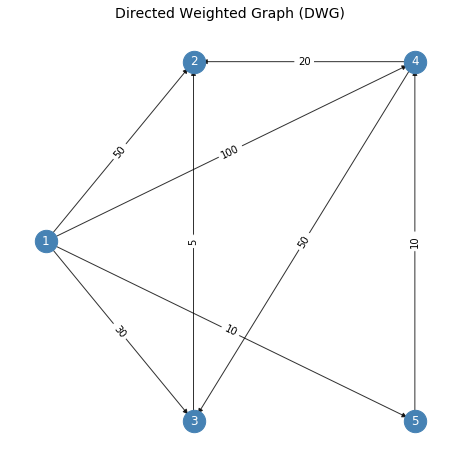

In [14]:
# Nodes labels
labels = {}
for n in dwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for s, t, w in edges:
    weights[(s, t)] = w

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 8]
nx.draw_networkx_nodes(dwg, pos, nodelist=dwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(dwg, pos, edgelist=dwg.edges(), width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_labels(dwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(dwg, pos, edge_labels=weights, font_color='black')
plt.title('Directed Weighted Graph (DWG)', fontsize=14)
plt.axis('off')
plt.show()

 ### Shortest Path

In [15]:
# Using Dijkstra algorithm
sp = nx.dijkstra_path(dwg, source = '5', target = '2')
sp

['5', '4', '2']

In [16]:
# Using Dijkstra algorithm
sp = nx.dijkstra_path_length(dwg, source = '5', target = '2')
sp

30

## 3. Dijkstra Algorithm

Below, a detailed version of the Dijkstra algorithm for directed graphs with edges with positive weights is shown.

In [17]:
# Returns the node with a minimum own distance
def get_min_node(nodes, weights):
    min_node = ''
    min_weigth = math.inf
    
    for n in nodes:
        w = weights[n]
        if w < min_weigth:
            min_node = n
            min_weigth = w
    
    return min_node

In [18]:
# A detailed version of the Dijkstra algorithm for directed graphs with edges with positive weights 
def get_dijkstra_dist(graph, source, verbose=False):
    nodes = list(graph.nodes())
    edges = graph.edges()
    
    # Validation
    if not source in nodes:
        return {}
    
    # Init distances
    dists = dict()
    for n in nodes:
        dists[n] = (0 if n == source else math.inf)
    paths = dict()
    for n in nodes:
        paths[n] = source
    
    # Greedy cycle
    while len(nodes) > 1:
        v = get_min_node(nodes, dists)
        if v == '':
            break
        
        nodes.remove(v)
        if verbose:
            print('>> curr node:', v, ', len:', len(nodes))
            
        for w in nodes:
            if (v, w) in edges:
                if dists[w] > dists[v] + edges[v, w]['weight']:
                    dists[w] = dists[v] + edges[v, w]['weight']
                    paths[w] = v
                    if verbose:
                        print('   v:', v, ', w:', w, ', weigth:', dists[w])
    
    return { 'distances': dists, 'paths': paths }

In [19]:
# Show shortes path from source node to target node
def get_shortes_path(dwg, source, target, verbose=False):
    start_time = timeit.default_timer()
    path = []
    
    # Get the distance from 'source' to the other nodes
    sol = get_dijkstra_dist(dwg, source, verbose)
    paths = sol['paths']
    
    # Get shortest path from 'source' to 'target'
    ix = target
    while ix != source:
        path.append(ix)
        ix = paths[ix]
    path.append(source)
    path.reverse()
    
    weight = sol['distances'][target]
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return { 'path': path, 'weight': weight }

In [20]:
# Example of the shortes path calculation from '5' to '2'
source = '5'
target = '2'
get_shortes_path(dwg, source, target, True)

>> curr node: 5 , len: 4
   v: 5 , w: 4 , weigth: 10
>> curr node: 4 , len: 3
   v: 4 , w: 2 , weigth: 30
   v: 4 , w: 3 , weigth: 60
>> curr node: 2 , len: 2
>> curr node: 3 , len: 1
>> elapsed time 13.201099999999999 ms


{'path': ['5', '4', '2'], 'weight': 30}

---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>